## Milestone II: Exploratory Data Analysis

**Team: Title Generation**

Karina Huang, Abhimanyu Vasishth, Phoebe Wong

_we have contacted our TF, Alexander Lin, and scheduled a meeting on Monday Apr 29._

---

#### Project Statement

Given the full text or the abstract of an academic paper, we want to generate a title for the academic paper. 
Title generation can be approached from a text summarization perspective, where it is considered as compressing a scientific article to reflect its content. We would like to explore the idea of using the content of articles to automatically generate title and evaluate those titles to see if they share similar semantic meaning and information with the original titles.

#### Literature Review

[Vinyals et al.](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Vinyals_Show_and_Tell_2015_CVPR_paper.pdf) set up an end-to-end model consisting of a CNN for vision and an RNN for text-generation in order to generate image captions by maximizing the target description sentence given the training image. The CNN, essentially the "encoder", converts images into a fixed-length latent vector, which the RNN "decodes" to generate captions. Specifically, the authors use an LSTM in order to get around the vanishing and exploding gradient problem commonly faced by bare-bones RNNs. The authors propose a few different evaluation metrics including a human evaluation study on Amazon Mechanical Turk where each image and the corresponding caption is rated by 2 workers. Other evaluation strategies used include comparing the caption to the "ground-truth", essentially human-generated descriptions, and using the BLEU score, a metric which is a form of precision using n-grams between generated and reference sentences that is shown to correlate with human evaluations. An issue of note is the diversity in generation, with the possibility of model collapse, and the authors evaluate diversity by analyzing the top-15 generated sentences for each image. 

[Jin et al.](https://www.researchgate.net/publication/220812713_Title_Generation_for_Machine-Translated_Documents) outline approaches not utilizing deep neural networks (such as Naïve Bayesian, a K-Nearest Neighbour, a TF-IDF and an iterative Expectation-Maximization method) an provides us with a few different alternatives that we can use to compare to our neural network based model. The strengths of the neural network model (we hope) relative to the weaknesses of this approach should also help motivate the use of neural networks in title-generation.

Generating News Headlines with RNN by [Lopyrev](https://nlp.stanford.edu/courses/cs224n/2015/reports/1.pdf): this paper will give us an intuition about how to apply LSTMs and RNNs to the problem of title generation.

#### Preliminary EDA

The [Neural Information Processing Systems (NIPS)](https://www.kaggle.com/benhamner/nips-papers#papers.csv) dataset includes a total of 7,241 papers published between 1987 and 2017. Our exploratory analysis identified 4819 missing event type (whether the paper was presented as a poster, an oral or a spotlight presentation), and 3317 missing abstracts. For the papers with abstract, the number of words in abstract varies between 19 and 317. The number of words in title ranges from 1 to 20. The example of titles of length 1 below suggest the need of data cleaning for this variable. Likewise, the number of words in text ranges from 1 to 22,382. Note that mathematical notations and symbols were also counted in this preliminary analysis; data cleaning for texts is necessary before model fitting. 

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#check dataset
papers = pd.read_csv('papers.csv')
print('Size of data: ', papers.shape)
papers.head()

Size of data:  (7241, 7)


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
#check missing value
papers.isna().sum()

id               0
year             0
title            0
event_type    4819
pdf_name         0
abstract         0
paper_text       0
dtype: int64

In [4]:
#check missing abstract
missing = 0
for a in papers.abstract.values:
    if a == 'Abstract Missing':
        missing += 1
print('Number of papers missing abstracts: ', missing)

Number of papers missing abstracts:  3317


In [5]:
#check value counts for event type
papers.event_type.value_counts()

Poster       2146
Spotlight     181
Oral           95
Name: event_type, dtype: int64

Title with 1 word: 

['Gaussianization']
['Hyperkernels']
['Q-Clustering']
['Gates']
['<var>L_1</var>']
['Crowdclustering']
['<var>\\theta</var>']


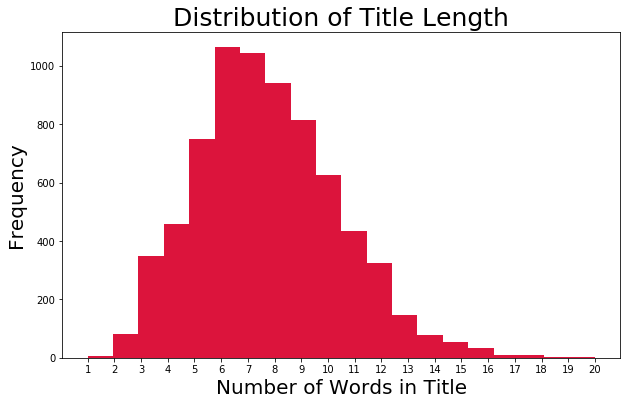

In [6]:
#check length of title
tLength = list()
print('Title with 1 word: ')
print()
for t in papers.title.values:
    t = t.replace('\n', ' ').split(' ')
    if len(t) <= 1:
        print(t)
    tLength.append(len(t))

#plot distribution of title length 
fig, ax = plt.subplots(figsize = (10, 6))
# sns.distplot(tLength, kde = False, ax = ax)
ax.hist(tLength, bins = 20, color = 'crimson')
ax.set_xticks(range(min(tLength), max(tLength)+1))
ax.set_xticklabels(range(min(tLength), max(tLength)+1))
ax.set_xlabel('Number of Words in Title', fontsize = 20)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Distribution of Title Length', fontsize = 25)
plt.show()

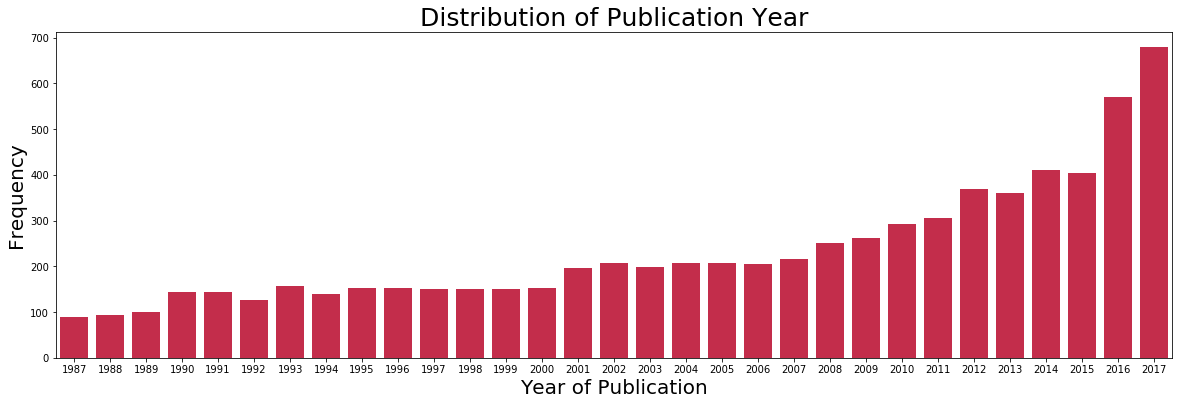

In [7]:
#check year of publication
fig, ax = plt.subplots(figsize = (20, 6))
sns.countplot(papers.year.values, ax = ax, color = 'crimson')
ax.set_xlabel('Year of Publication', fontsize = 20)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Distribution of Publication Year', fontsize = 25)
plt.show()

In [8]:
#check length of text
textLength = list()
for t in papers.paper_text.values:
    t = t.replace('\n', ' ').split(' ')
    textLength.append(len(t))

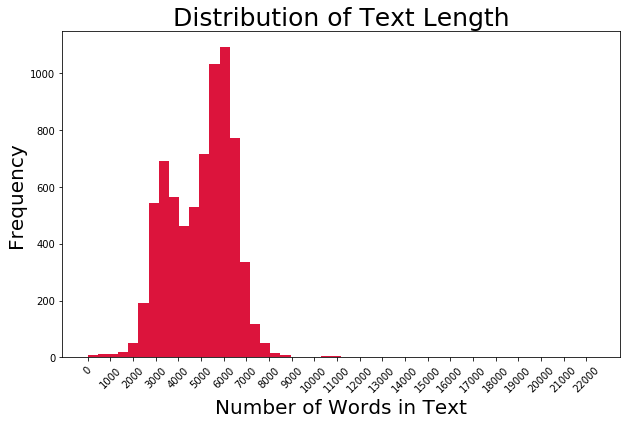

In [9]:
#plot distribution of text length 
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(textLength, bins = 50, color = 'crimson')
ax.set_xticks(range(0, max(textLength)+1, 1000))
ax.set_xticklabels(range(0, max(textLength)+1, 1000), rotation = 45)
ax.set_xlabel('Number of Words in Text', fontsize = 20)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Distribution of Text Length', fontsize = 25)
plt.show()

In [10]:
#check length of abstract
aLength = list()
for a in papers.abstract.values:
    if a != 'Abstract Missing':
        a = a.replace('\n', ' ').split(' ')
        aLength.append(len(a))

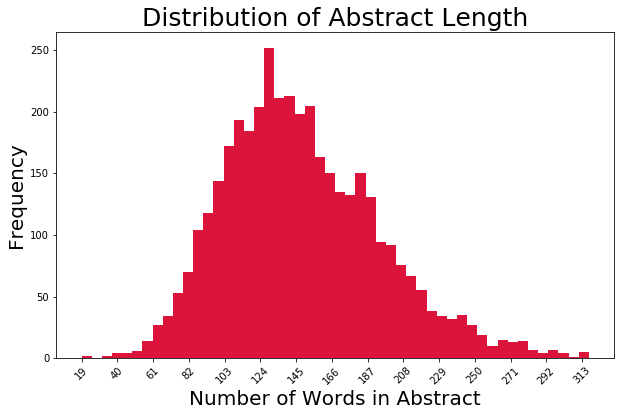

In [11]:
#plot distribution of abstract length 
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(aLength, bins = 50, color = 'crimson')
ax.set_xticks(range(min(aLength), max(aLength)+1, 21))
ax.set_xticklabels(range(min(aLength), max(aLength)+1, 21), rotation = 45)
ax.set_xlabel('Number of Words in Abstract', fontsize = 20)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Distribution of Abstract Length', fontsize = 25)
plt.show()

We also look for the most commonly occuring combinations of words (bigrams and tri-grams) in the full paper text as well as the title. These will likely be important features that our model will rely heavily on.

In [12]:
def top_ngrams(training_data, min_n=2, max_n=2, excluded_ngrams=[], max_features=500, stop_words='english'):
    # count vectorizer with stop words
    cv = CountVectorizer(ngram_range=(min_n,max_n), max_features = max_features, stop_words=stop_words)
    cv.fit(training_data)
    X = cv.transform(training_data)
    counts = X.sum(axis=0)
    
    # creating dataframe with top n-grams sorted by counts in descending order
    df = pd.DataFrame({'n-grams': cv.get_feature_names(), 'Count': counts.tolist()[0]})
    df = df[df['n-grams'].map(lambda x: x not in excluded_ngrams)]
    df.sort_values(by='Count', ascending=False, inplace=True)
    return df

In [13]:
#bigrams or trigrams in full text
excluded_ngrams = ["et al","10 10","international conference","neural information","information processing",
                   "processing systems","advances neural","supplementary material", "10 10 10", 
                   "neural information processing", "information processing systems"]

df_ngrams_full_text = top_ngrams(papers['paper_text'], min_n=2, max_n=3, excluded_ngrams=excluded_ngrams)
df_ngrams_full_text.head(10) # top 10 bigrams & trigrams

,n-grams,Count
258,machine learning,15745
304,neural networks,11948
303,neural network,8129
457,training set,6804
39,advances neural information,6671
454,training data,5843
106,data set,5450
382,reinforcement learning,5168
255,lower bound,5117
151,figure shows,5020


In [14]:
#bigrams or trigrams in title
df_ngrams_title = top_ngrams(papers['title'], min_n=2, max_n=3, excluded_ngrams=excluded_ngrams)
df_ngrams_title.head(10) # top 10 bigrams & trigrams

,n-grams,Count
321,neural networks,272
380,reinforcement learning,154
319,neural network,148
142,gaussian process,79
197,large scale,70
159,graphical models,68
167,high dimensional,64
444,support vector,57
392,semi supervised,57
283,monte carlo,53


NeurIPS (formerly NIPS) is a conference about information processing. Therefore, it is unsurprising that many of the commonly occuring bi-grams and tri-grams pertain to this theme (such as machine learning, neural networks, training set, data set, reinforcement learning etc). From a title generation point of view, the strong thematic links between the different documents may result in "generic" titles about machine learning and information processing, which we have to carefully deal with in our modeling stage.

---